# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the MD/MC code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the MD/MC code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Equilibrazione

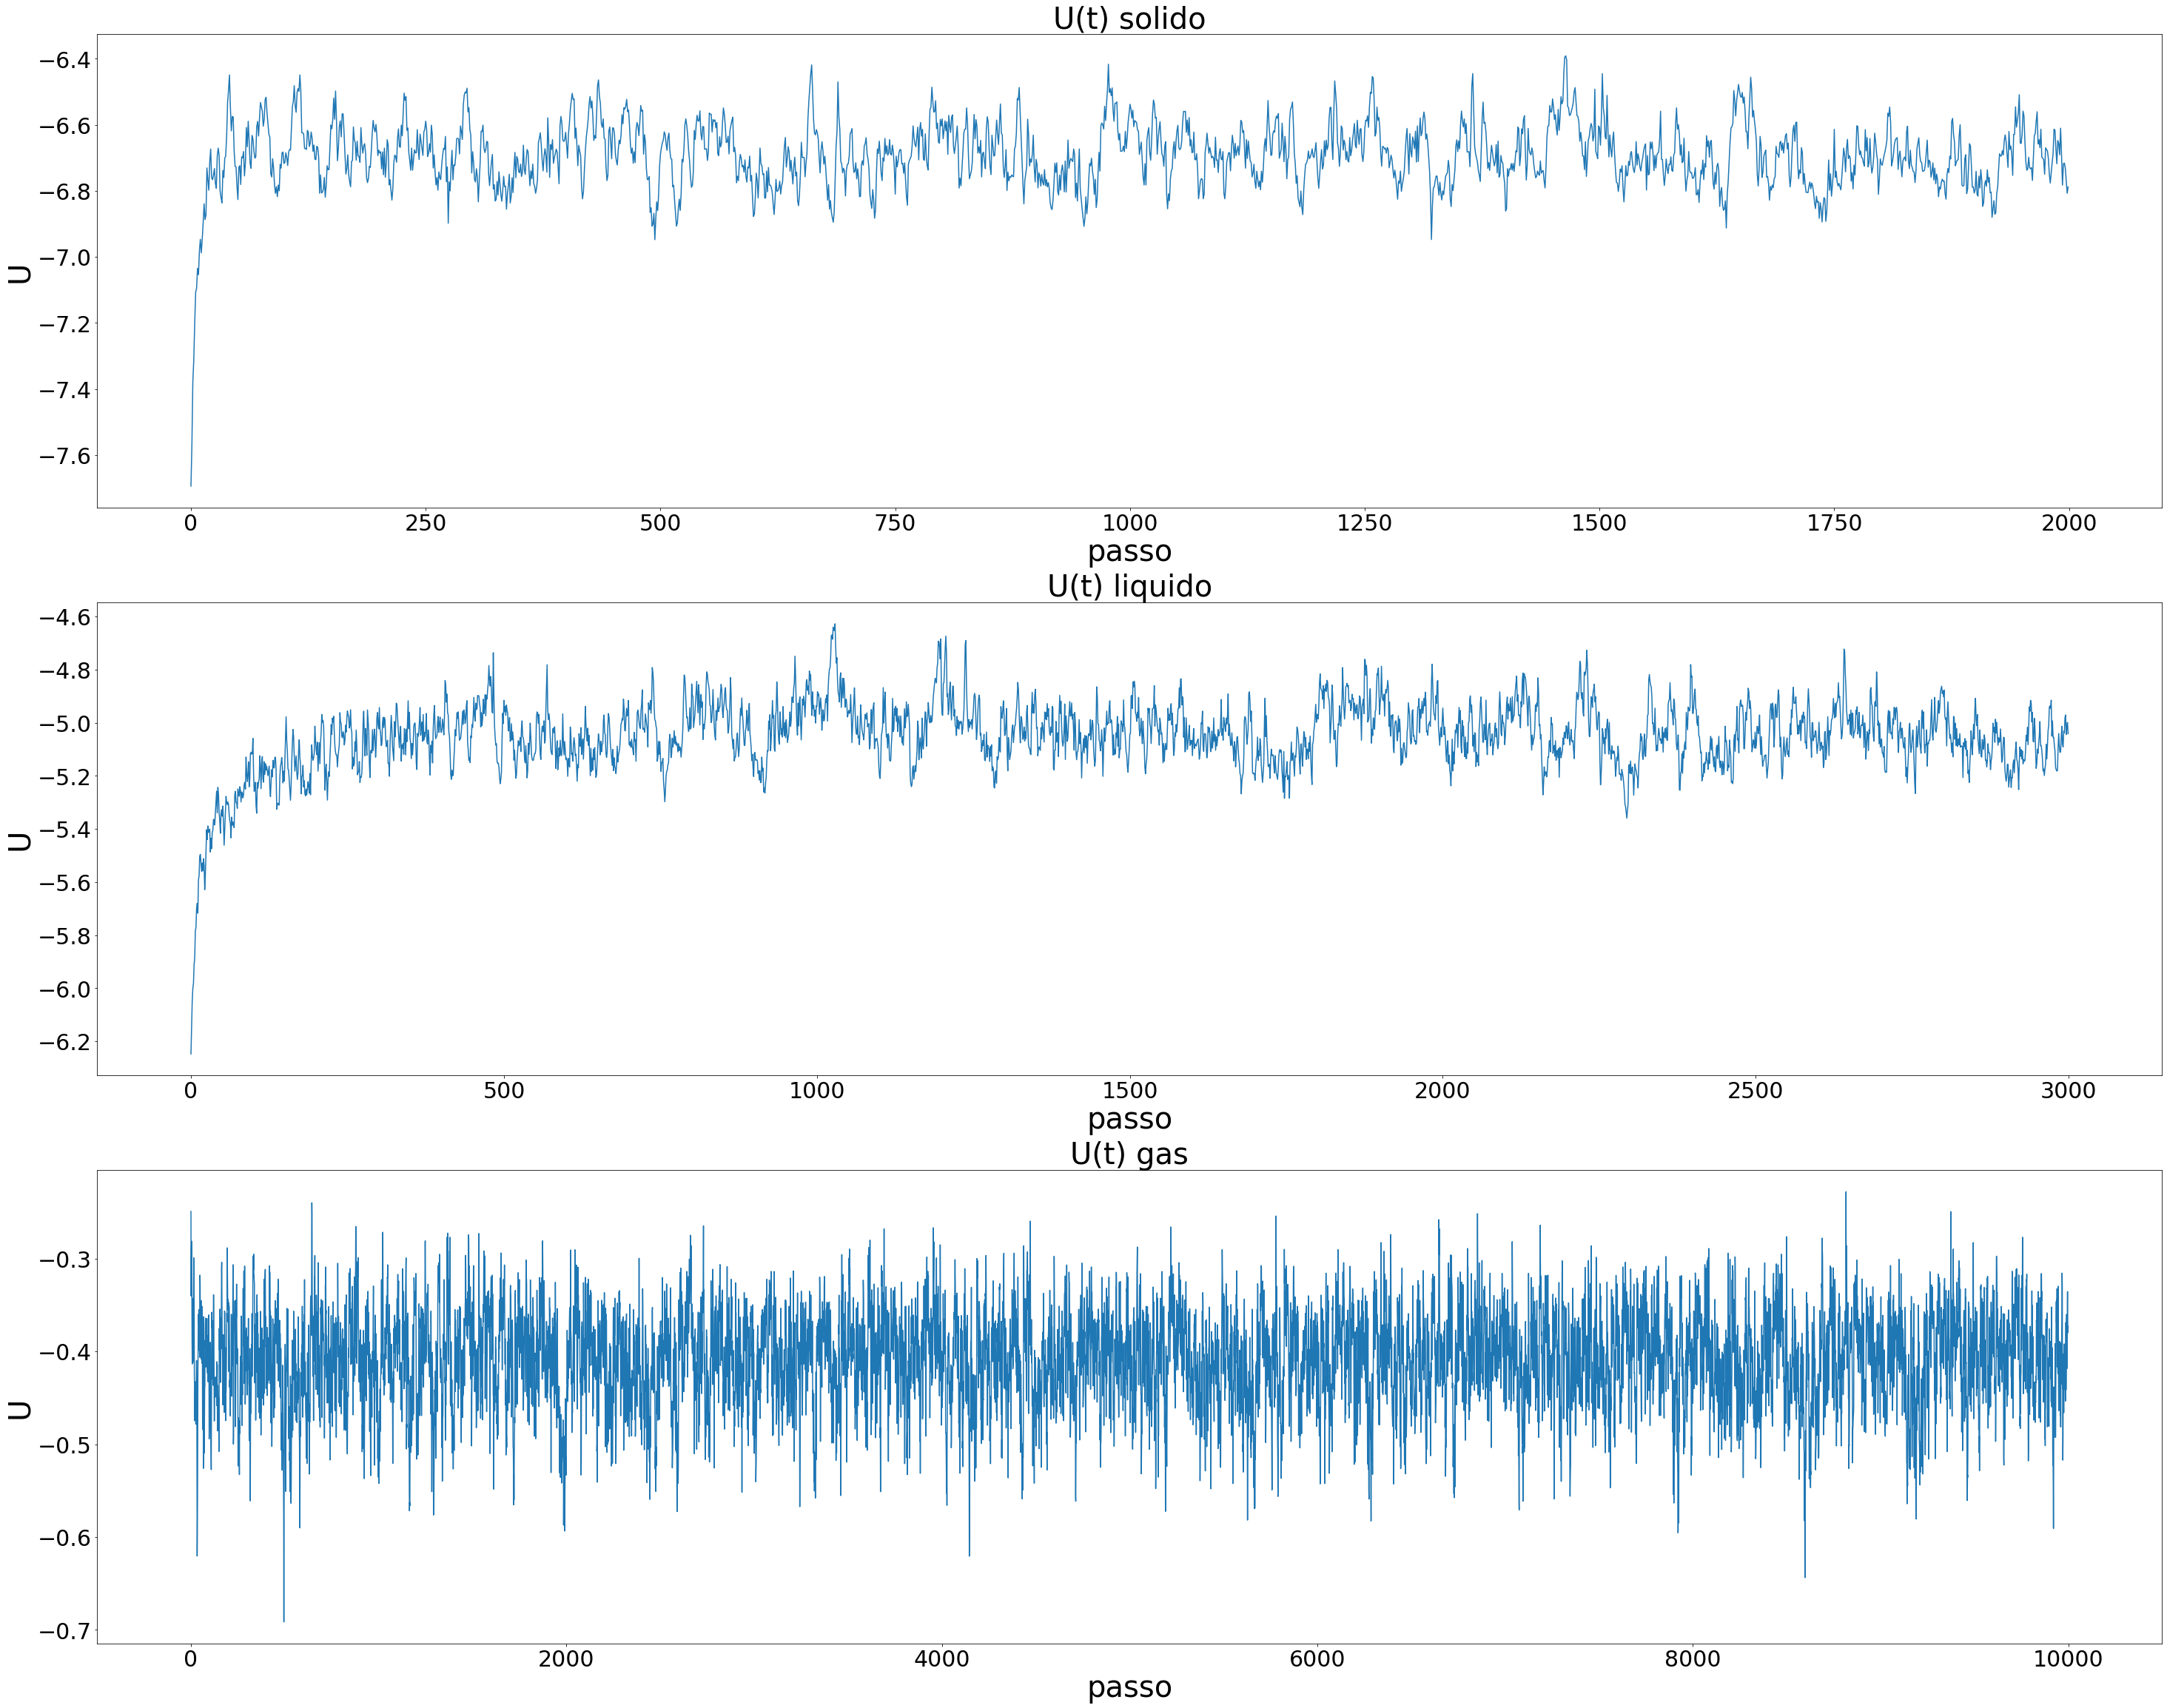

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


fig, [ax1, ax0, ax2] = plt.subplots(3, 1 , figsize=(50, 40))

temp_s = np.loadtxt("solid/eq.epot.s.1.out", usecols=(1), unpack='true')
x = np.arange(0,temp_s.size)
ax1.plot(x, temp_s)
ax1.set_title("U(t) solido", fontsize="40")
ax1.set_ylabel("U", fontsize="40")
ax1.set_xlabel("passo", fontsize="40")
ax1.tick_params(labelsize=30)

temp_l = np.loadtxt("liquid/eq.epot.l.1.out", usecols=(1), unpack='true')
x = np.arange(0,temp_l.size)
ax0.plot(x, temp_l)
ax0.set_title("U(t) liquido", fontsize="40")
ax0.set_ylabel("U", fontsize="40")
ax0.set_xlabel("passo", fontsize="40")
ax0.tick_params(labelsize=30)

temp_g = np.loadtxt("gas/eq.epot.g.1.out", usecols=(1), unpack='true')
x = np.arange(0,temp_g.size)
ax2.plot(x, temp_g)
ax2.set_title("U(t) gas", fontsize="40")
ax2.set_ylabel("U", fontsize="40")
ax2.set_xlabel("passo", fontsize="40")
ax2.tick_params(labelsize=30)


### Solid phase calculations

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


U_s = np.loadtxt("solid/is_epot.s.1.out", usecols=(1), unpack="true")
z = np.arange(0, U_s.size)

#Calcolo autocorrelazione
print ("[Calculating Autocorrelation]")
aut_passi = 500
aut_size = 400000
x_s = np.arange(aut_passi)
Aut_s = np.zeros(aut_passi)



m = np.mean(U_s[0:aut_size])
mm = np.var(U_s[0:aut_size])
for i in range(aut_passi):
    print(int(i/aut_passi*100), "%", end='\r')
    m1 = 0
    m2 = 0
    for j in range(aut_size):
        m1 += U_s[j + i]
        m2 += U_s[j + i]*U_s[j]
    Aut_s[i] = (m2 - m1*m)/(aut_size*mm)


#Calcolo Incertezza in funzione del numero di passi per blocco

print ("[Calculating Uncertanty]")

L = np.array([             #steps per block
    i
  for i in range(1,5001) if 50000%i == 0
])

n = L.size
dev_st_s = np.zeros(n)

for k in range(n):
    print(int(k/n*100), "%", end='\r')
    N = int(500000/L[k])
    blk_av = np.zeros(N)
    for i in range(N):
        for j in range(L[k]):
            blk_av[i] += U_s[i*L[k] + j]

    blk_av /= L[k]
    dev_st_s[k] = np.std(blk_av)/math.sqrt(N)

[Calculating Autocorrelation]
[Calculating Uncertanty]


### Liquid Phase Calculations

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


U_l = np.loadtxt("liquid/is_epot.l.1.out", usecols=(1), unpack="true")
z = np.arange(0, U_l.size)


#Calcolo autocorrelazione
print ("[Calculating Autocorrelation]")
aut_passi = 500
aut_size = 400000
x_l = np.arange(aut_passi)
Aut_l = np.zeros(aut_passi)



m = np.mean(U_l[0:aut_size])
mm = np.var(U_l[0:aut_size])
for i in range(aut_passi):
    print(int(i/aut_passi*100), "%", end='\r')
    m1 = 0
    m2 = 0
    for j in range(aut_size):
        m1 += U_l[j + i]
        m2 += U_l[j + i]*U_l[j]
    Aut_l[i] = (m2 - m1*m)/(aut_size*mm)


#Calcolo Incertezza in funzione del numero di passi per blocco

print ("[Calculating Uncertanty]")

L = np.array([             #steps per block
    i
  for i in range(1,5001) if 50000%i == 0
])

n = L.size
dev_st_l = np.zeros(n)

for k in range(n):
    print(int(k/n*100), "%", end='\r')
    N = int(500000/L[k])
    blk_av = np.zeros(N)
    for i in range(N):
        for j in range(L[k]):
            blk_av[i] += U_l[i*L[k] + j]

    blk_av /= L[k]
    dev_st_l[k] = np.std(blk_av)/math.sqrt(N)



[Calculating Autocorrelation]
[Calculating Uncertanty]


### Gas phase calculations

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


U_g = np.loadtxt("gas/is_epot.g.1.out", usecols=(1), unpack="true")
z = np.arange(0, U_g.size)

#Calcolo autocorrelazione
print ("[Calculating Autocorrelation]")
aut_passi = 500
aut_size = 400000
x_g = np.arange(aut_passi)
Aut_g = np.zeros(aut_passi)



m = np.mean(U_g[0:aut_size])
mm = np.var(U_g[0:aut_size])
for i in range(aut_passi):
    print(int(i/aut_passi*100), "%", end='\r')
    m1 = 0
    m2 = 0
    for j in range(aut_size):
        m1 += U_g[j + i]
        m2 += U_g[j + i]*U_g[j]
    Aut_g[i] = (m2 - m1*m)/(aut_size*mm)


#Calcolo Incertezza in funzione del numero di passi per blocco

print ("[Calculating Uncertanty]")

L = np.array([             #steps per block
    i
  for i in range(1,5001) if 50000%i == 0
])

n = L.size
dev_st_g = np.zeros(n)

for k in range(n):
    print(int(k/n*100), "%", end='\r')
    N = int(500000/L[k])
    blk_av = np.zeros(N)
    for i in range(N):
        for j in range(L[k]):
            blk_av[i] += U_g[i*L[k] + j]

    blk_av /= L[k]
    dev_st_g[k] = np.std(blk_av)/math.sqrt(N)

[Calculating Autocorrelation]
[Calculating Uncertanty]


### Autocorrelazione

Text(0.5, 0, 'Passo')

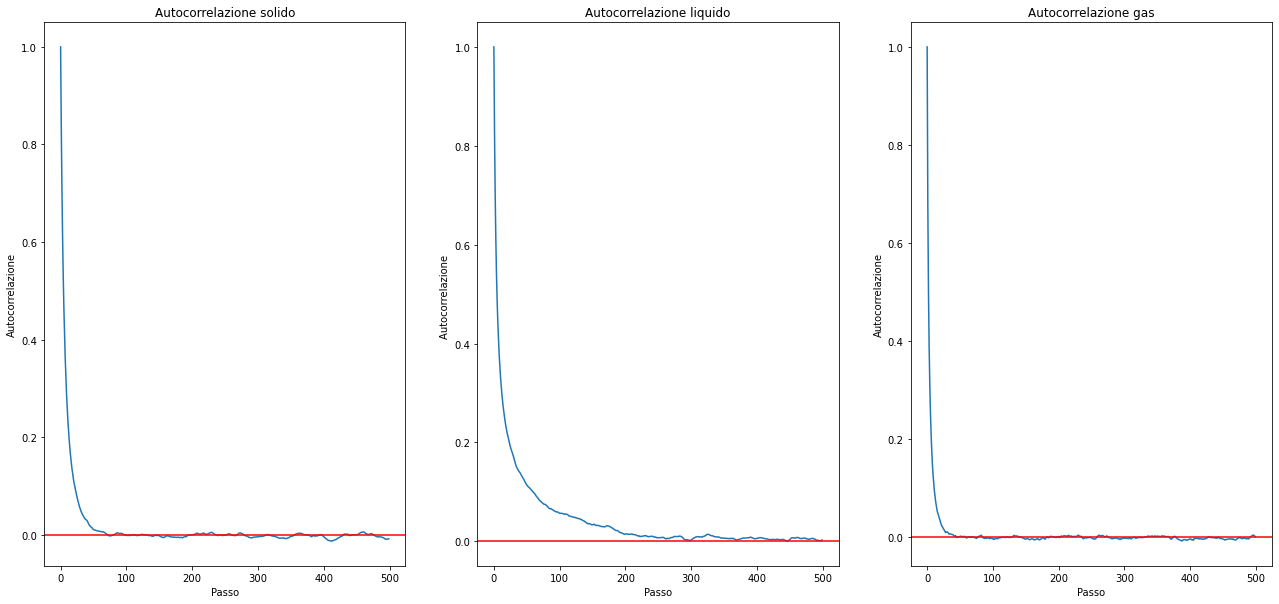

In [37]:
fig2, [ax_s1, ax_l1, ax_g1] = plt.subplots(1, 3, figsize=(22,10))

ax_s1.plot(x_s, Aut_s)
ax_s1.axhline(0, color="red")
ax_l1.plot(x_l, Aut_l)
ax_l1.axhline(0, color="red")
ax_g1.plot(x_g, Aut_g)
ax_g1.axhline(0, color="red")

ax_s1.set_title('Autocorrelazione solido')
ax_s1.set_ylabel('Autocorrelazione')
ax_s1.set_xlabel("Passo")
ax_l1.set_title("Autocorrelazione liquido")
ax_l1.set_ylabel('Autocorrelazione ')
ax_l1.set_xlabel("Passo")
ax_g1.set_title('Autocorrelazione gas')
ax_g1.set_ylabel('Autocorrelazione')
ax_g1.set_xlabel("Passo")

Il tempo di correlazione misura il tempo impiegato dal sistema per arrivare ad uno stato scorrelato da quello attuale. Come atteso, le autocorrelazioni plottate nei precedenti grafici sono significative per tempi brevi, mentre decadono all'aumentare del tempo. 
Le correlazioni per il sistema gassoso decadono molto più rapidamente che negli altri casi. Questo potrebbe accadere perchè il gas si trova in una condizione di quasi isotropia. Ciò rende le mosse MC più simili ad un random walk (infatti nonostante si cercasse di cambiare il raggio del passo MC, l'acceptance rate non scendeva sotto lo 0.6) e quindi meno correlate rispetto agli altri due stati.


### Incertezza in funzione del numero di passi per blocco

Text(0.5, 0, 'Numero di passi')

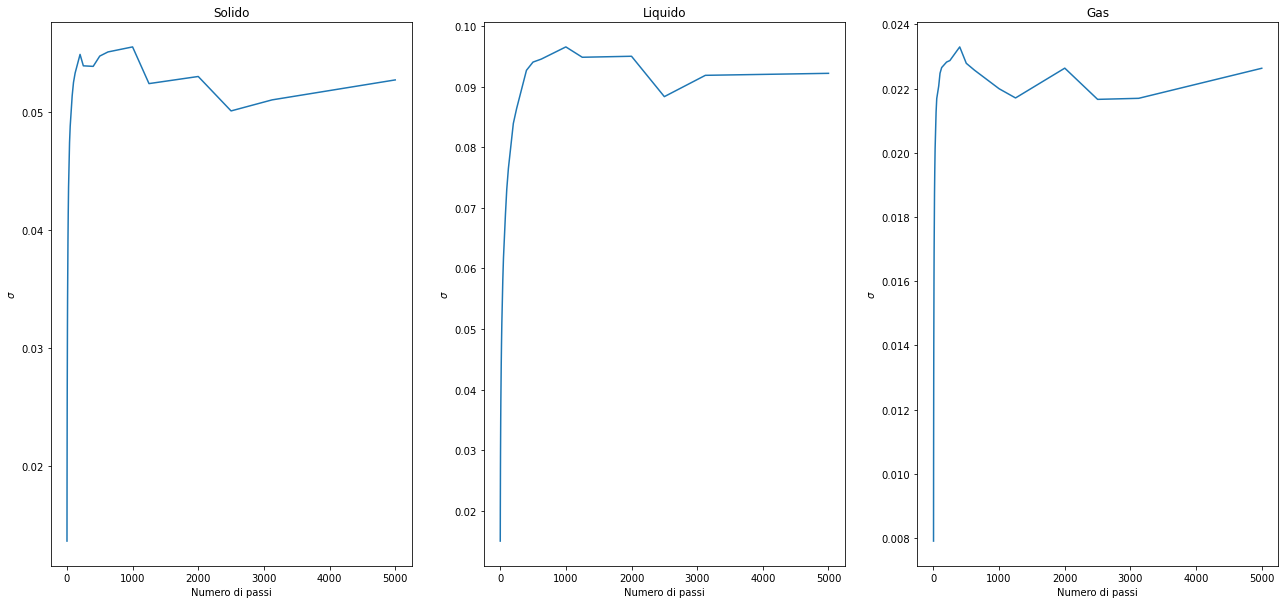

In [27]:
fig1, [ax_s2, ax_l2, ax_g2] = plt.subplots(1, 3, figsize=(22,10))

ax_s2.plot(L, dev_st_s)
ax_l2.plot(L, dev_st_l)
ax_g2.plot(L, dev_st_g)


ax_s2.set_title('Solido')
ax_s2.set_ylabel('$\sigma$')
ax_s2.set_xlabel("Numero di passi")
ax_l2.set_title("Liquido")
ax_l2.set_ylabel('$\sigma$')
ax_l2.set_xlabel("Numero di passi")
ax_g2.set_title('Gas')
ax_g2.set_ylabel('$\sigma$')
ax_g2.set_xlabel("Numero di passi")

Comesi può vedere dai grafici l'incertezza statistica per numero di passi per bloocco ridotti dipende dal numero di passi, mentre da un certo punto in poi l'incertezza sembra scorrelata dal numero di blocchi. Ciò dipende dal fatto che i dati in blocchi diversi sono scorrelati in per numero alto di passi.
Il valore del numero di passi limite dovrebbe essere lo stesso valore in cui l'autocorrelazione tocca lo zero.
Infatti si può notare che per il liquido la funzione incertezza ci mette leggermente di più per appiattirsi 

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the MD/MC code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

### Solid Phase

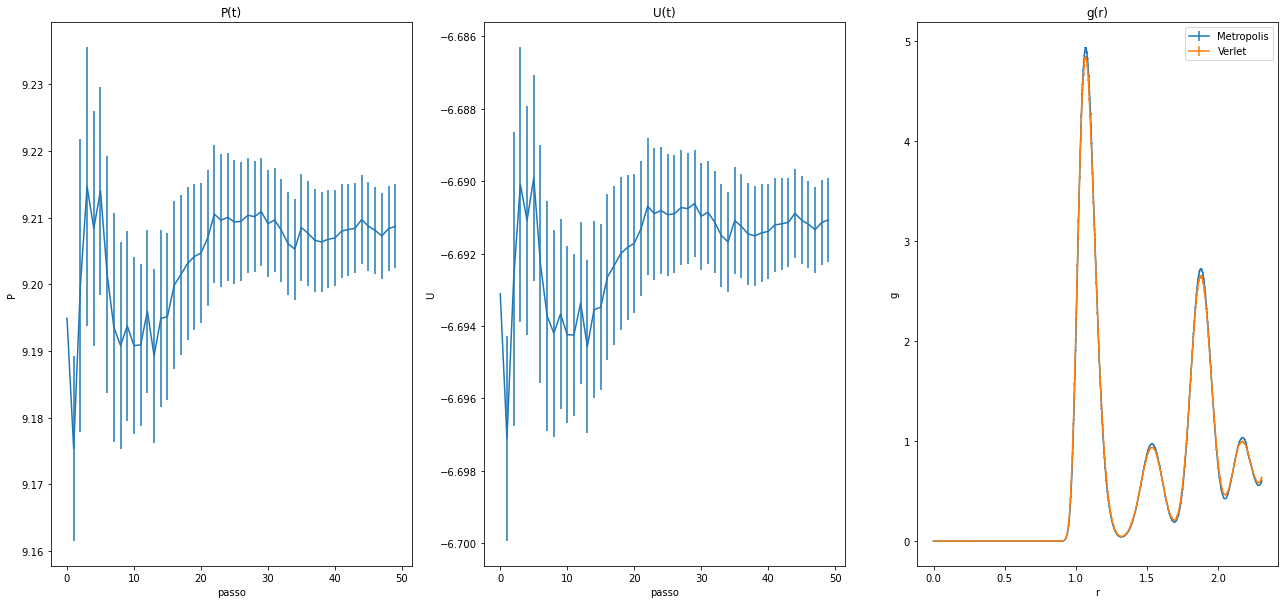

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


epot, erre = np.loadtxt("solid/epot.s.1.out", usecols=(2, 3), unpack='true')
x = np.arange(0,epot.size)
pres, errp = np.loadtxt("solid/pres.s.1.out", usecols=(2, 3), unpack='true')
xp = np.arange(0,pres.size)
xg, g_r, errg = np.loadtxt("solid/G_r_fin.s.1.out", usecols=(0,1,2), unpack='true')
xg1, g_r1, errg1 = np.loadtxt("/home/pistol/Desktop/sim_num/ex4/MDNVE_MCNVT/solid/G_r_fin.s.0.out", usecols=(0,1,2), unpack='true')



fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(22,10))

ax0.errorbar(xp, pres, yerr=errp)
ax0.set_title("P(t)")
ax0.set_ylabel("P")
ax0.set_xlabel("passo")

ax2.errorbar(xg, g_r, yerr=errg, label='Metropolis')
ax2.errorbar(xg1, g_r1, yerr=errg1, label='Verlet')
ax2.set_title("g(r)")
ax2.set_ylabel("g")
ax2.set_xlabel("r")

ax1.errorbar(x, epot, yerr=erre)
ax1.set_title("U(t)")
ax1.set_ylabel("U")
ax1.set_xlabel("passo")

ax2.legend()


### Liquid phase

Text(0.5, 0, 'passo')

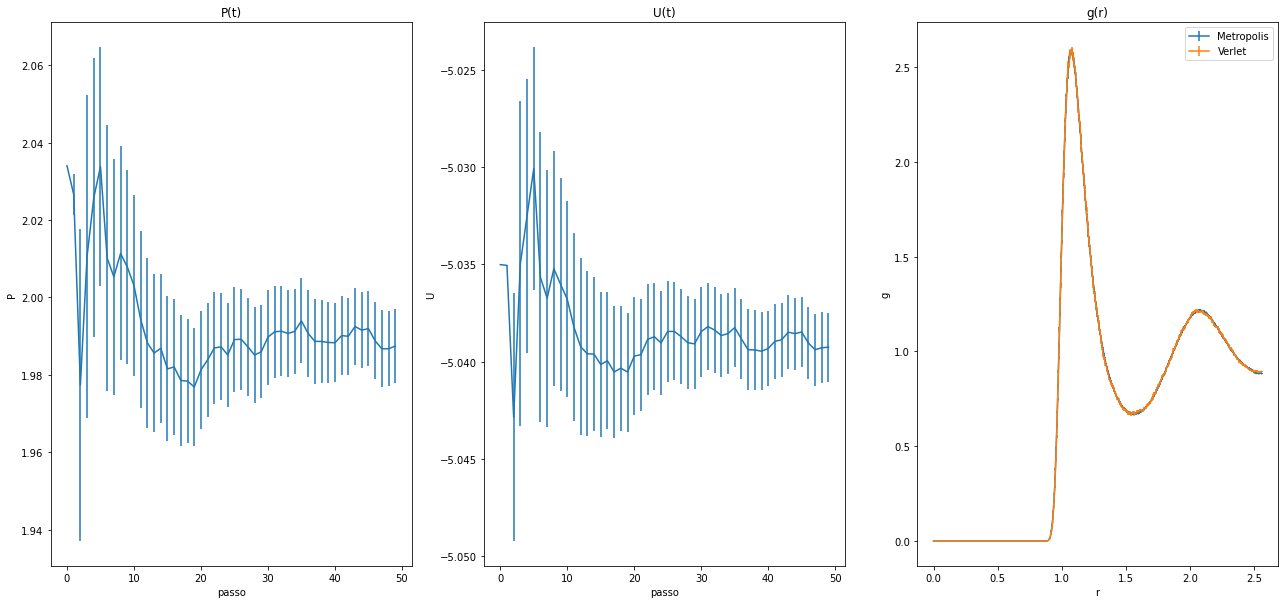

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


epot, erre = np.loadtxt("liquid/epot.l.1.out", usecols=(2, 3), unpack='true')
x = np.arange(0,epot.size)
pres, errp = np.loadtxt("liquid/pres.l.1.out", usecols=(2, 3), unpack='true')
xp = np.arange(0,pres.size)
xg, g_r, errg = np.loadtxt("liquid/G_r_fin.l.1.out", usecols=(0,1,2), unpack='true')
xg1, g_r1, errg1 = np.loadtxt("/home/pistol/Desktop/sim_num/ex4/MDNVE_MCNVT/liquid/G_r_fin.l.0.out", usecols=(0,1,2), unpack='true')



fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(22,10))

ax0.errorbar(xp, pres, yerr=errp)
ax0.set_title("P(t)")
ax0.set_ylabel("P")
ax0.set_xlabel("passo")

ax2.errorbar(xg, g_r, yerr=errg, label='Metropolis')
ax2.errorbar(xg1, g_r1, yerr=errg1, label='Verlet')
ax2.set_title("g(r)")
ax2.set_ylabel("g")
ax2.set_xlabel("r")
ax2.legend()


ax1.errorbar(x, epot, yerr=erre)
ax1.set_title("U(t)")
ax1.set_ylabel("U")
ax1.set_xlabel("passo")


### Gas Phase

Text(0.5, 0, 'passo')

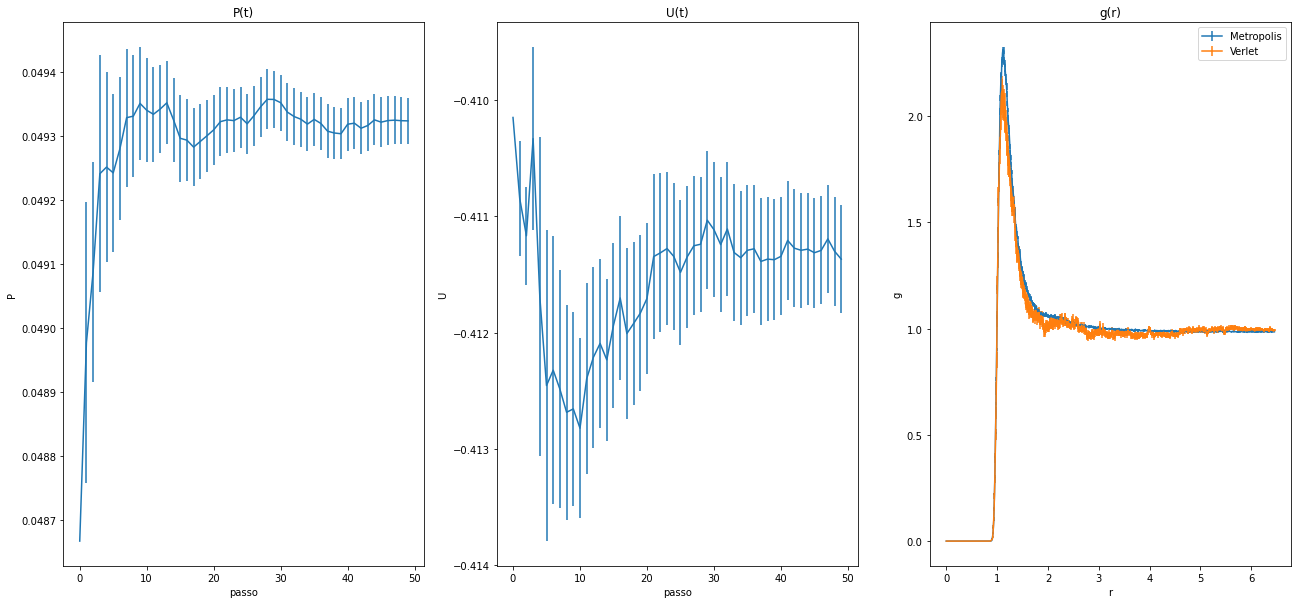

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


epot, erre = np.loadtxt("gas/epot.g.1.out", usecols=(2, 3), unpack='true')
x = np.arange(0,epot.size)
pres, errp = np.loadtxt("gas/pres.g.1.out", usecols=(2, 3), unpack='true')
xp = np.arange(0,pres.size)
xg, g_r, errg = np.loadtxt("gas/G_r_fin.g.1.out", usecols=(0,1,2), unpack='true')
xg1, g_r1, errg1 = np.loadtxt("/home/pistol/Desktop/sim_num/ex4/MDNVE_MCNVT/gas/G_r_fin.g.0.out", usecols=(0,1,2), unpack='true')




fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(22,10))

ax0.errorbar(xp, pres, yerr=errp)
ax0.set_title("P(t)")
ax0.set_ylabel("P")
ax0.set_xlabel("passo")

ax2.errorbar(xg, g_r, yerr=errg, label='Metropolis')
ax2.errorbar(xg1, g_r1, yerr=errg1, label='Verlet')
ax2.set_title("g(r)")
ax2.set_ylabel("g")
ax2.set_xlabel("r")
ax2.legend()


ax1.errorbar(x, epot, yerr=erre)
ax1.set_title("U(t)")
ax1.set_ylabel("U")
ax1.set_xlabel("passo")


I valori di energia e pressione sonon simili a quelli ottenuti nell'esercitazione 4, a meno di correzioni di coda, quindi abbiamo verificato che i due approcci alla dinamica molecolare sono uguali. Anche le funzioni g(r) sono compatibili.